In [1]:
from importlib import reload

import jax.numpy as jnp
import matplotlib.pyplot as plt
from scipy.signal import chirp

from crusade import conversion_methods, utils

In [3]:
token = None
# with open("token.txt", "r") as f:
#     token = f.read().strip()
train_dataset = utils.download_dataset(token=token, split="train")

Label: 1


W1231 12:08:58.711701 2096035 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W1231 12:08:58.715066 2080235 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.


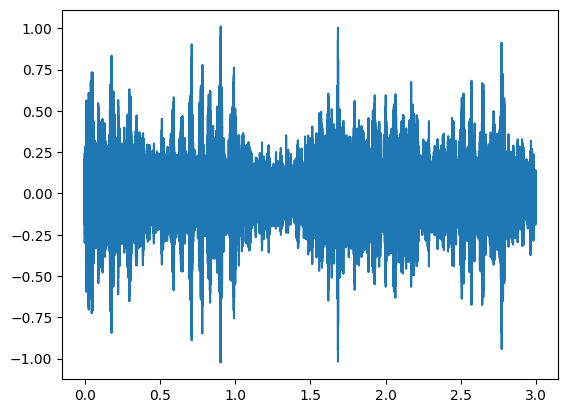

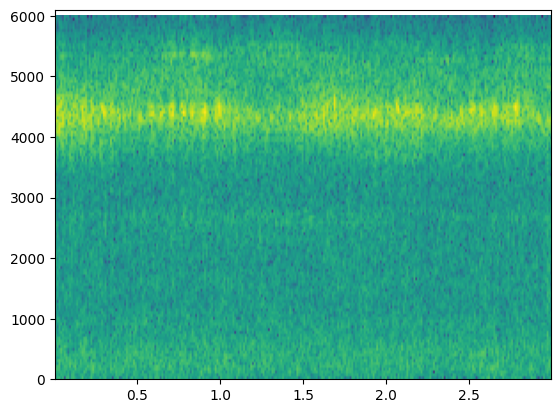

In [4]:
frequency = 4410000
sample = 0
# region_dataset = train_dataset[sample]["audio"]["path"]
# print(f"Region: {region_dataset}")
label_dataset = train_dataset[sample]["label"]
print(f"Label: {label_dataset}")
# print(f"Region: {region_dataset}, Label: {label_dataset}")
scaled_audio = utils.audio_resampling_and_scaling(
    train_dataset[sample]["audio"]["array"],
    original_frequency=train_dataset[sample]["audio"]["sampling_rate"],
    target_frequency=frequency,
    scaling_factor="normalize",
)


plt.plot(
    jnp.linspace(0, len(scaled_audio) / frequency, num=len(scaled_audio)), scaled_audio
)
plt.show()
fig_spec, ax_spec = plt.subplots()
ax_spec.specgram(
    train_dataset[sample]["audio"]["array"],
    Fs=train_dataset[sample]["audio"]["sampling_rate"],
    mode="magnitude",
)  # , NFFT = frequency//100)
ax_spec.set_ylim(0, 6100)
fig_spec.show()

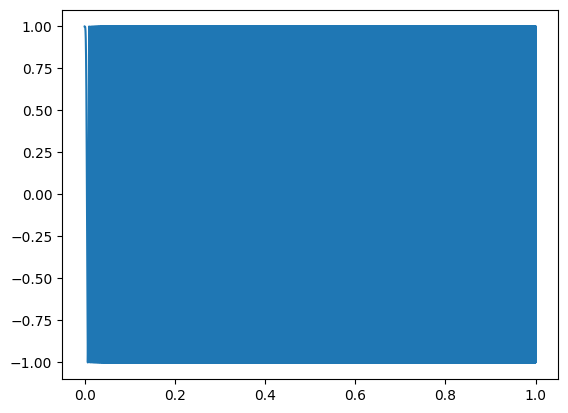

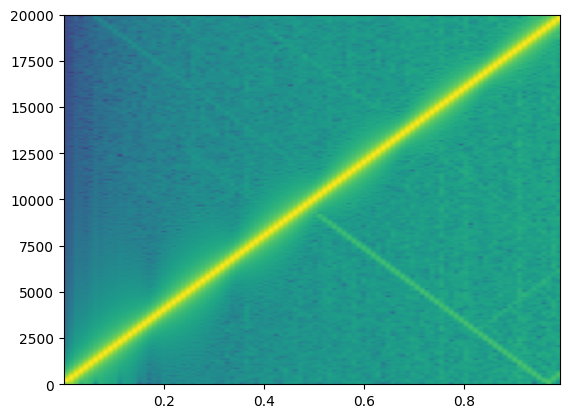

In [5]:
frequency = 441000

scaled_audio = chirp(
    jnp.linspace(0, 1, num=frequency), f0=0, f1=20e3, t1=1, method="linear"
)
# scaled_audio = utils.mu_encoding(scaled_audio)
plt.plot(
    jnp.linspace(0, len(scaled_audio) / frequency, num=len(scaled_audio)), scaled_audio
)
plt.show()

plt.specgram(x=scaled_audio, Fs=frequency, mode="magnitude", NFFT=frequency // 100)
plt.ylim(0, 20000)
plt.show()

In [6]:
reload(conversion_methods)

<module 'crusade.conversion_methods' from '/home/p306945/Projects/MALEFICENT/rfcx_snn/src/crusade/conversion_methods.py'>

In [7]:
num_neurons = 12
neuron_model = conversion_methods.filterbank_ADM(num_neurons=num_neurons)

event_time, event_address, event_magnitude = neuron_model(
    scaled_audio, sampling_rate=frequency
)

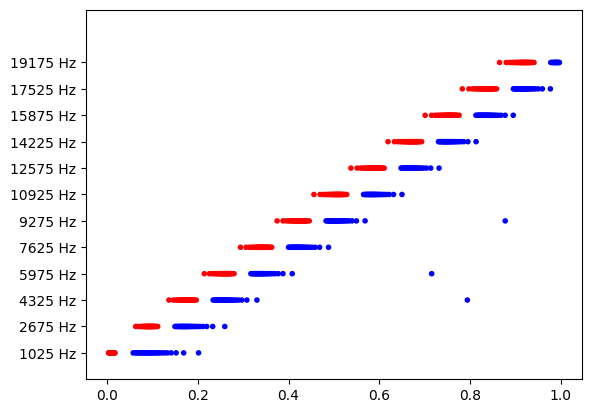

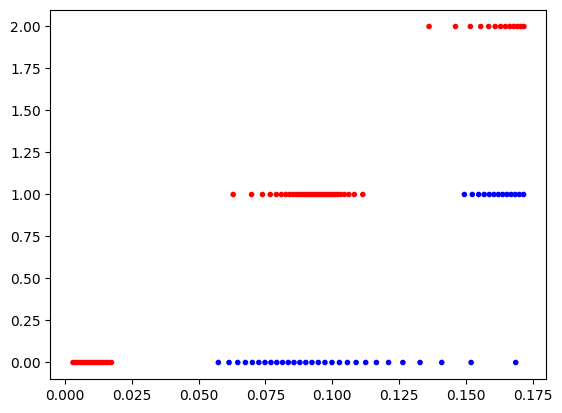

In [8]:
plt.scatter(x=event_time, y=event_address, marker=".", c=event_magnitude, cmap="bwr")
plt.ylim(-1, num_neurons + 1)
plt.yticks(
    ticks=jnp.arange(0, num_neurons, 1),
    labels=[f"{int(f)} Hz" for f in neuron_model.frequencies],
)
plt.show()
# plt.savefig("event_plot.png")
plt.clf()
plt.scatter(
    x=event_time[0:100],
    y=event_address[0:100],
    marker=".",
    c=event_magnitude[0:100],
    cmap="bwr",
)
plt.show()
# plt.savefig("event_plot_100.png")
# plt.plot(x, y)
# plt.show()